In [8]:
import numpy as np
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt

In [22]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabel("'15-'16 SALARY", "SALARY")
nba

PLAYER,POSITION,TEAM,SALARY
Paul Millsap,PF,Atlanta Hawks,18.6717
Al Horford,C,Atlanta Hawks,12
Tiago Splitter,C,Atlanta Hawks,9.75625
Jeff Teague,PG,Atlanta Hawks,8
Kyle Korver,SG,Atlanta Hawks,5.74648
Thabo Sefolosha,SF,Atlanta Hawks,4
Mike Scott,PF,Atlanta Hawks,3.33333
Kent Bazemore,SF,Atlanta Hawks,2
Dennis Schroder,PG,Atlanta Hawks,1.7634
Tim Hardaway Jr.,SG,Atlanta Hawks,1.30452


## Confidence Interval for Testing

* Example:
    * Null hypothesis: population average = x
    * Alternative hypothesis: population average != x
    * Construct (100 - p-value)% confidence interval for population average
        * If x in confidence interval, can't reject null hypothesis
        * If x *not* in confidence interval, **can** reject null hypothesis

## Center and Spread

* Center
    * Mean
    * Median
* Spread
    * Range
        * Does not give idea of how data is distributed
    * Standard deviation
        * Spread from average
        * Bulk of data within a few standard deviations from average

In [14]:
# Calculate mean
salary_mean = np.mean(nba.column('SALARY'))
salary_mean

5.074814482014388

In [15]:
# Calculate standard deviation
salary_sd = np.std(nba.column('SALARY'))
salary_sd

5.215172804825777

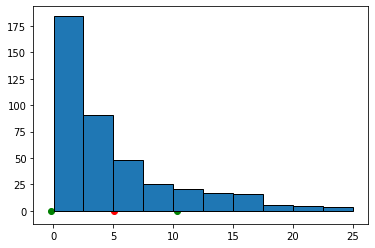

In [28]:
plt.hist(nba.column('SALARY'))
plt.scatter(salary_mean, 0, c='r')
plt.scatter(salary_mean - salary_sd, 0, c='g')
plt.scatter(salary_mean + salary_sd, 0, c='g')

## Normal Curve

* Standard units - represent data in terms of mean and standard deviation
$$ z~~=~~\frac{\text{data value} - \text{mean}}{\text{standard deviation}}$$
* Chebyshev's Inequality - No matter what the shape of the distribution, the proportion of values in the range “average ± z SDs” is at least 
$$1 - \frac{1}{z^2}$$
* For normal distribution:
    * average ± 1 SD - about 68%
    * average ± 2 SD - about 95%
    * average ± 3 SD - about 99.73%

In [ ]:
# Represent SALARY in histogram using standard units


## Central Limit Theorem

* Distribution of sums and averages of large random samples is roughly normal, regardless of distribution from which sample is drawn
* Centered at population mean or sum
* Spread varies with sample size
    * Standard Deviation
    $$
    \frac{
        \text{population standard dev.}
    }{
        \sqrt{\text{sample size}}
    }
    $$

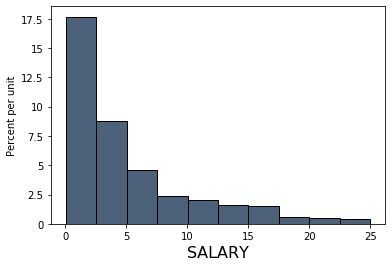

In [10]:
nba.group("SALARY")

In [23]:
def sample_mean_salaries(sample_size, repetitions=2000):
    sample_means = make_array()
    for i in np.arange(repetitions):
        sample = nba.sample(sample_size)
        sample_mean = sample.column('SALARY').mean()
        sample_means = np.append(sample_means, sample_mean)
    return sample_means

In [25]:
sample_means = {}
sample_sizes = [1, 4, 16, 64, 100, 900, 1600]

for size in sample_sizes:
    sample_means[size] = sample_mean_salaries(size)

SD of The Population: 5.215172804825777
Sample Size: 1
SD of This Distribution (Sample Mean): 5.365751135381695
Sample Size: 4
SD of This Distribution (Sample Mean): 2.6522746707374787
Sample Size: 16
SD of This Distribution (Sample Mean): 1.3564472566075245
Sample Size: 64
SD of This Distribution (Sample Mean): 0.6557939419523825
Sample Size: 100
SD of This Distribution (Sample Mean): 0.5205348024787686
Sample Size: 900
SD of This Distribution (Sample Mean): 0.16930515022871098
Sample Size: 1600
SD of This Distribution (Sample Mean): 0.1328379741269757


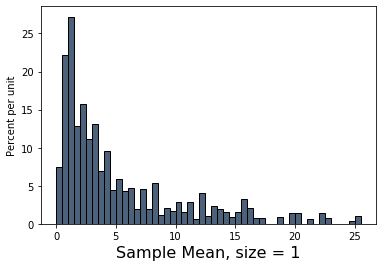

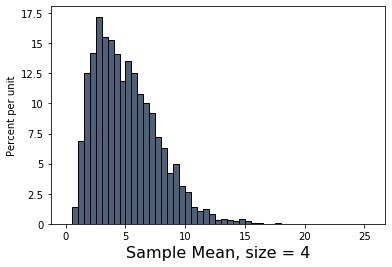

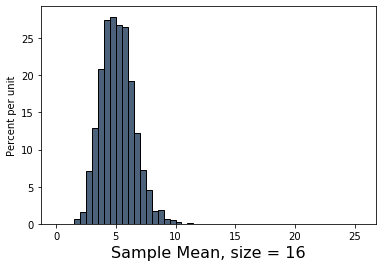

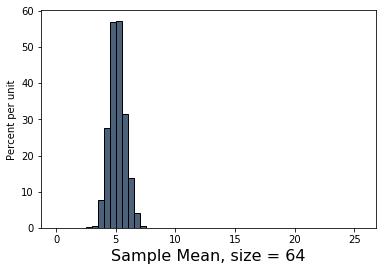

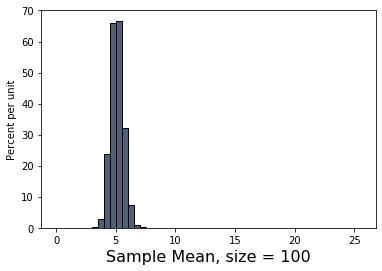

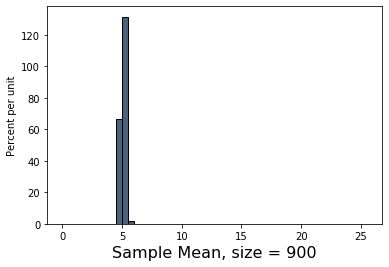

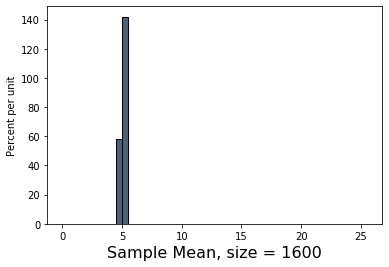

In [27]:
#: plot the distributions
print("SD of The Population:", np.std(nba.column('SALARY')))
bins = np.arange(0, 26, 0.5)
for size in sample_sizes:
    Table().with_column(
        f'Sample Mean, size = {size}',
        sample_means[size]
    ).hist(bins=bins)
    print("Sample Size:", size)
    print("SD of This Distribution (Sample Mean):", np.std(sample_means[size]))

## Prediction

* Given one characteristic, predict another characteristic
* Association - any pattern or relationship between variables
* Correlation - a linear association
* Correlation coefficient
    - **Definition**: The correlation coefficient $r$ of two attributes $x$ and $y$ is the average value of the product of $x$ and $y$ when measured in standard units.
    - If `x` and `y` are arrays (i.e. columns in a table): 
    ```
    r = np.mean(x_su * y_su)
    ```
    where `x_su` and `y_su` are `x` and `y` converted to standard units.
    - Measures how clustered points are around a straight line (linear association)
    - Based on standard units
    - $-1 \leq r \leq 1$
    - $r = 1$: scatterplot is a line of slope 1.
    - $r = -1$: scatterplot is a line of slope -1.
    - $r = 0$: no linear association; *uncorrelated*.
    

In [29]:
framingham = Table.read_table('framingham.csv')

In [ ]:
# Let's look at AGE and TOTCHOL
# 1. Scatter data


In [ ]:
# Represent data in standard units


In [ ]:
# Calculate the correlation coefficient
